In [1]:
import json
import os
import re
import logging
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

from nnattack.variables import auto_var, get_file_name

logging.basicConfig(level=0)

def get_result(auto_var):
    file_name = get_file_name(auto_var, name_only=True).replace("_", "-")
    file_path = f"./results/{file_name}.json"
    if not os.path.exists(file_path):
        return None
    try:
        with open(file_path, "r") as f:
            ret = json.load(f)
    except:
        print("problem with %s" % file_path)
        raise
    return ret


def params_to_dataframe(grid_param):
    params, loaded_results = auto_var.run_grid_params(get_result, grid_param, with_hook=False, verbose=0, n_jobs=1)
    results = [r['results'] if isinstance(r, dict) else r for r in loaded_results]
    params, results = zip(*[(params[i], results[i]) for i in range(len(params)) if results[i]])
    params, results = list(params), list(results)
    print(len(results))
    accs = []
    for i, param in enumerate(params):
        for r in results[i]:
            #params[i][f'eps_{r["eps"]:.2f}_trn'] = r['trn_acc']
            params[i][f'eps_{r["eps"]:.2f}_tst'] = r['tst_acc']
    df = pd.DataFrame(params)
    return df

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'knn3', 'inf', 'direct_3')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', 'inf', 'kernelSubTf_1_pgd')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100_region')


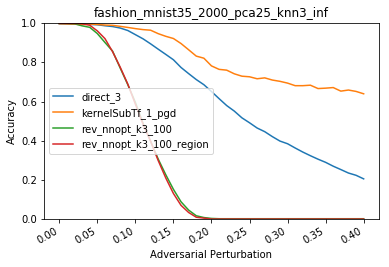

('identity', 'fashion_mnist35_2000_pca25', 'knn3', '2', 'direct_3')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', '2', 'kernelSubTf_1_pgd')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100')
('identity', 'fashion_mnist35_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100_region')


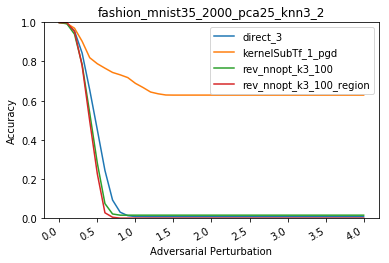

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'knn3', 'inf', 'direct_3')
('identity', 'mnist35_2000_pca25', 'knn3', 'inf', 'kernelSubTf_1_pgd')
('identity', 'mnist35_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100')
('identity', 'mnist35_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100_region')


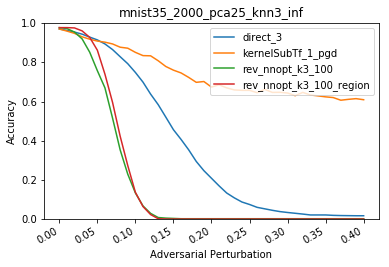

('identity', 'mnist35_2000_pca25', 'knn3', '2', 'direct_3')
('identity', 'mnist35_2000_pca25', 'knn3', '2', 'kernelSubTf_1_pgd')
('identity', 'mnist35_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100')
('identity', 'mnist35_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100_region')


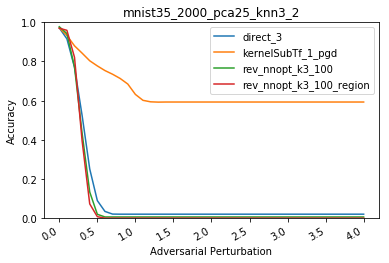

fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'knn3', 'inf', 'direct_3')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', 'inf', 'kernelSubTf_1_pgd')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', 'inf', 'rev_nnopt_k3_100_region')


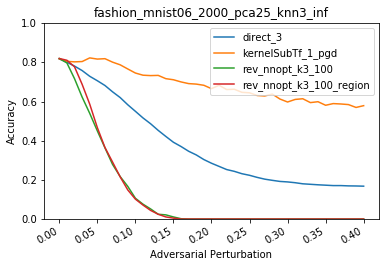

('identity', 'fashion_mnist06_2000_pca25', 'knn3', '2', 'direct_3')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', '2', 'kernelSubTf_1_pgd')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100')
('identity', 'fashion_mnist06_2000_pca25', 'knn3', '2', 'rev_nnopt_k3_100_region')


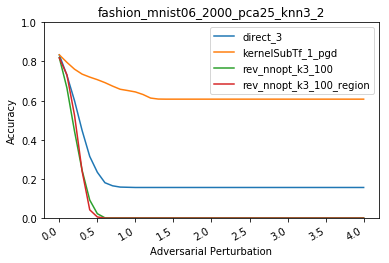

2019-03-07 17:56:21 WARNING  No handles with labels found to put in legend.


mnist17_2000_pca25


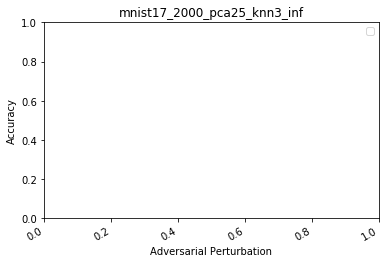

2019-03-07 17:56:21 WARNING  No handles with labels found to put in legend.


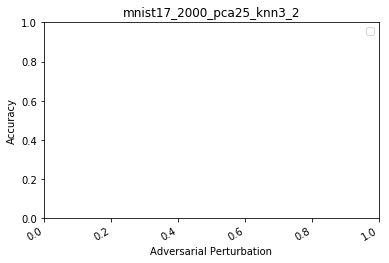

In [2]:
grid_param = {
    'model': ['knn1', 'knn3'],
    'ord': ['inf', '2'],
    'transformer': ['identity'],
    #'dataset': ['fashion_mnist35_200_pca25', 'mnist35_200_pca25', 'fashion_mnist06_200_pca25'],
    'dataset': ['fashion_mnist35_2000_pca25', 'fashion_mnist35_200_pca25',
                'mnist35_2000_pca25', 'fashion_mnist06_2000_pca25'],
    #'attack': ['fgsm'],
    'attack': ['rev_nnopt_k3_100', 'rev_nnopt_k3_50', 'rev_nnopt_k3_100_region',
               'direct_1', 'direct_3', 'nnopt_k1_all', 'kernelSubTf_1_pgd'],
    'random_seed': list(range(10))
}
params, results = auto_var.run_grid_params(get_result, grid_param, with_hook=False, verbose=0, n_jobs=1)
params, results = zip(*[(params[i], results[i]) for i in range(len(params)) if results[i]])
params, results = list(params), list(results)
accs = []
for i, param in enumerate(params):
    for r in results[i]:
        #params[i][f'eps_{r["eps"]:.2f}_trn'] = r['trn_acc']
        params[i][f'eps_{r["eps"]:.2f}_tst'] = r['tst_acc']
df = pd.DataFrame(params)

#datasets = ['fashion_mnist35_200_pca25', 'mnist35_200_pca25', 'fashion_mnist06_200_pca25']
datasets = ['fashion_mnist35_2000_pca25', 'mnist35_2000_pca25', 'fashion_mnist06_2000_pca25', 'mnist17_2000_pca25']
attack = ''
for dataset in datasets:
    print(dataset)
    for model_name in ['knn3']:
        for ord in ['inf', '2']:
            
            temp_df = df.loc[(df['model'] == model_name) & (df['dataset'] == dataset) & (df['ord'] == ord)]
            fig, ax = plt.subplots()
            ax.set_title(f'{dataset}_{model_name}_{ord}')
            for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
                print(name)
                eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
                s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
                x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]
                  
                ax.plot(x, s, label=name[-1])
                  
            fig.autofmt_xdate()
            ax.legend()
            ax.set_ylim(0, 1)
            ax.set_ylabel('Accuracy')
            ax.set_xlabel('Adversarial Perturbation')
            plt.savefig(f'./figs/{dataset}_{model_name}_{ord}.eps', format='eps')
            plt.show()
                  

Using TensorFlow backend.


25
fashion_mnist35_2000_pca5
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'direct_1') 1
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'kernelSubTf_1_pgd') 1
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_50') 1


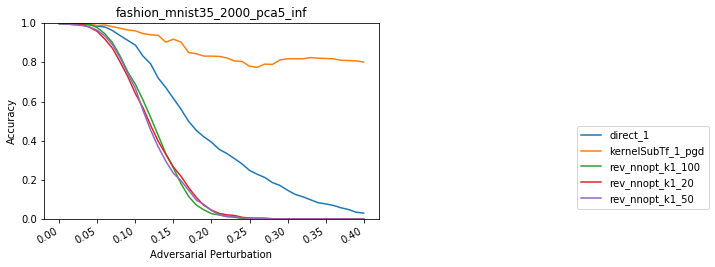

fashion_mnist06_2000_pca5
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'direct_1') 1
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'kernelSubTf_1_pgd') 1
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_50') 1


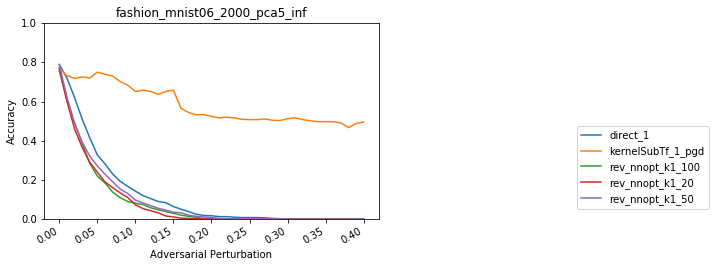

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'knn1', 'inf', 'direct_1') 1
('identity', 'fashion_mnist35_2000_pca25', 'knn1', 'inf', 'kernelSubTf_1_pgd') 1
('identity', 'fashion_mnist35_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist35_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist35_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_50') 1


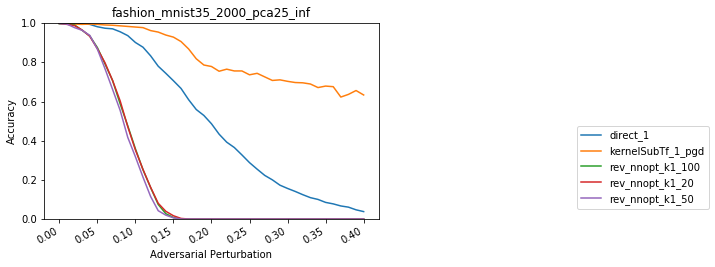

fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'knn1', 'inf', 'direct_1') 1
('identity', 'fashion_mnist06_2000_pca25', 'knn1', 'inf', 'kernelSubTf_1_pgd') 1
('identity', 'fashion_mnist06_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist06_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist06_2000_pca25', 'knn1', 'inf', 'rev_nnopt_k1_50') 1


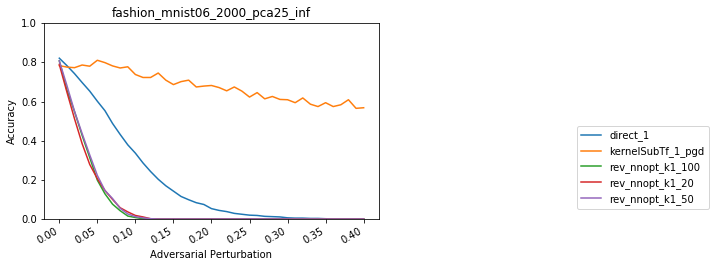

halfmoon2000
('identity', 'halfmoon2000', 'knn1', 'inf', 'direct_1') 1
('identity', 'halfmoon2000', 'knn1', 'inf', 'kernelSubTf_1_pgd') 1
('identity', 'halfmoon2000', 'knn1', 'inf', 'rev_nnopt_k1_100') 1
('identity', 'halfmoon2000', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'halfmoon2000', 'knn1', 'inf', 'rev_nnopt_k1_50') 1


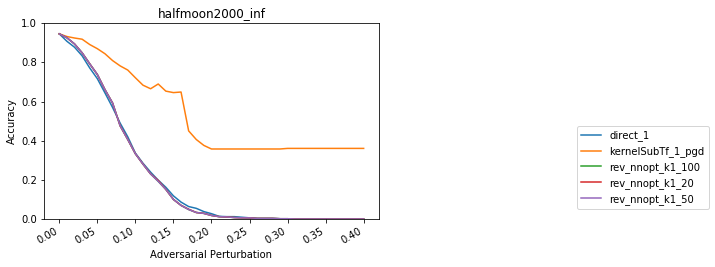

In [3]:
from params import knn1_attack
_, grid_param, _ = knn1_attack()

df = params_to_dataframe(grid_param)

datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param['dataset']
for dataset in datasets:
    print(dataset)
    for ord in grid_param['ord']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s" % (name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend(bbox_to_anchor=(1.5, 0., 0.5, 0.5))
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{dataset}_{ord}.eps', format='eps')
        plt.show()


16
fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'knn1', '2', 'direct_1') 1
('identity', 'fashion_mnist06_2000_pca25', 'knn1', '2', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist06_2000_pca25', 'robustnn', '2', 'direct_1') 1
('identity', 'fashion_mnist06_2000_pca25', 'robustnn', '2', 'rev_nnopt_k1_100') 1


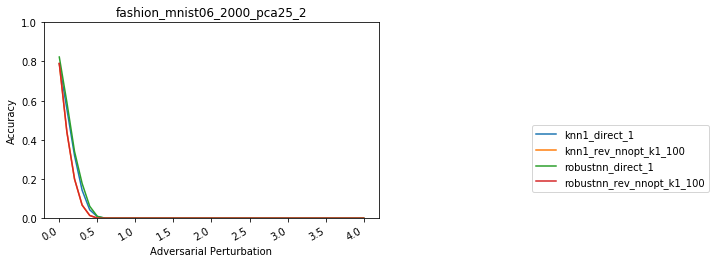

halfmoon2000
('identity', 'halfmoon2000', 'knn1', '2', 'direct_1') 1
('identity', 'halfmoon2000', 'knn1', '2', 'rev_nnopt_k1_100') 1
('identity', 'halfmoon2000', 'robustnn', '2', 'direct_1') 1
('identity', 'halfmoon2000', 'robustnn', '2', 'rev_nnopt_k1_100') 1


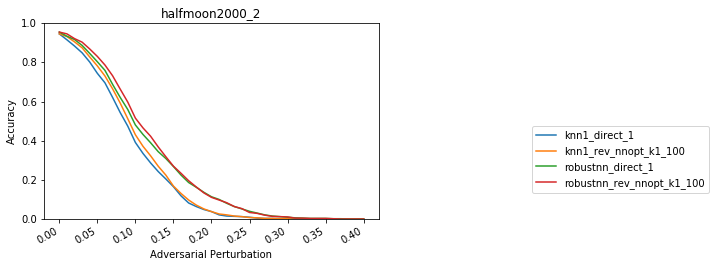

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'knn1', '2', 'direct_1') 1
('identity', 'fashion_mnist35_2000_pca25', 'knn1', '2', 'rev_nnopt_k1_100') 1
('identity', 'fashion_mnist35_2000_pca25', 'robustnn', '2', 'direct_1') 1
('identity', 'fashion_mnist35_2000_pca25', 'robustnn', '2', 'rev_nnopt_k1_100') 1


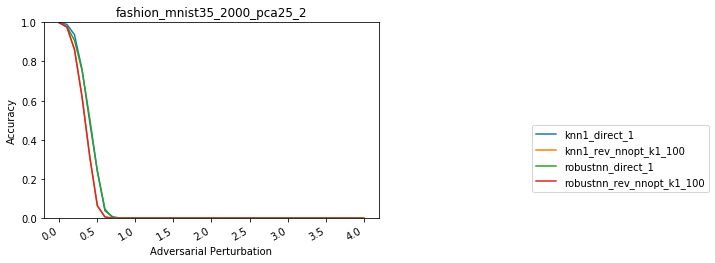

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'knn1', '2', 'direct_1') 1
('identity', 'mnist35_2000_pca25', 'knn1', '2', 'rev_nnopt_k1_100') 1
('identity', 'mnist35_2000_pca25', 'robustnn', '2', 'direct_1') 1
('identity', 'mnist35_2000_pca25', 'robustnn', '2', 'rev_nnopt_k1_100') 1


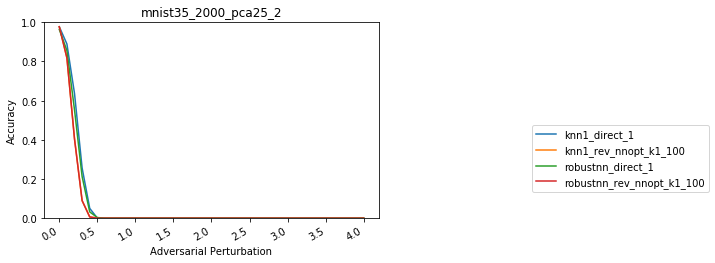

In [4]:
from params import robustnn_with_opt_attack
_, grid_param, _ = robustnn_with_opt_attack()

df = params_to_dataframe(grid_param)

datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param['dataset']
for dataset in datasets:
    print(dataset)
    for ord in grid_param[0]['ord']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend(bbox_to_anchor=(1.5, 0., 0.5, 0.5))
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{dataset}_{ord}.eps', format='eps')
        plt.show()

75
fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'adv_decision_tree_1', 'inf', 'dt_attack_opt') 5
('identity', 'fashion_mnist06_2000_pca25', 'decision_tree', 'inf', 'dt_attack_opt') 5
('identity', 'fashion_mnist06_2000_pca25', 'robustv1_decision_tree_10', 'inf', 'dt_attack_opt') 5


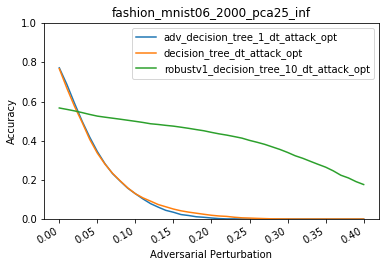

halfmoon2000
('identity', 'halfmoon2000', 'adv_decision_tree_1', 'inf', 'dt_attack_opt') 5
('identity', 'halfmoon2000', 'decision_tree', 'inf', 'dt_attack_opt') 5
('identity', 'halfmoon2000', 'robustv1_decision_tree_1', 'inf', 'dt_attack_opt') 5


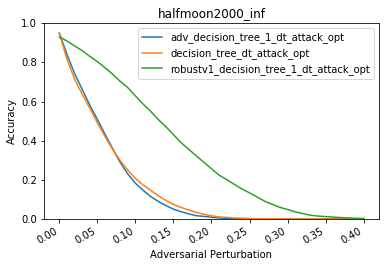

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'adv_decision_tree_1', 'inf', 'dt_attack_opt') 5
('identity', 'mnist35_2000_pca25', 'decision_tree', 'inf', 'dt_attack_opt') 5
('identity', 'mnist35_2000_pca25', 'robustv1_decision_tree_10', 'inf', 'dt_attack_opt') 5


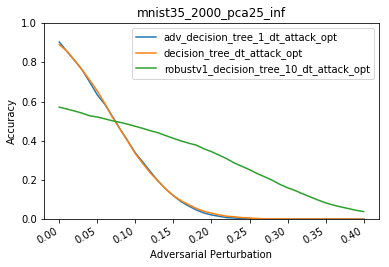

mnist17_2000_pca25
('identity', 'mnist17_2000_pca25', 'adv_decision_tree_1', 'inf', 'dt_attack_opt') 5
('identity', 'mnist17_2000_pca25', 'decision_tree', 'inf', 'dt_attack_opt') 5
('identity', 'mnist17_2000_pca25', 'robustv1_decision_tree_10', 'inf', 'dt_attack_opt') 5


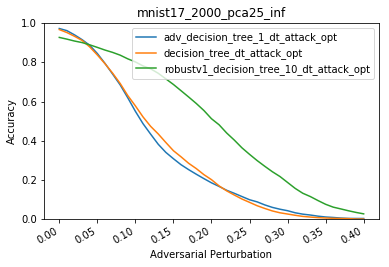

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'adv_decision_tree_1', 'inf', 'dt_attack_opt') 5
('identity', 'fashion_mnist35_2000_pca25', 'decision_tree', 'inf', 'dt_attack_opt') 5
('identity', 'fashion_mnist35_2000_pca25', 'robustv1_decision_tree_10', 'inf', 'dt_attack_opt') 5


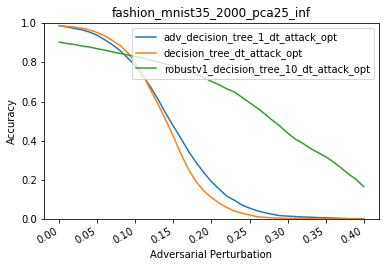

In [5]:
from params import dt_attack
exp_name = "adv_dt"
_, grid_param, _ = dt_attack()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param
for dataset in datasets:
    print(dataset)
    for ord in ['inf']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()

75
('identity', 'fashion_mnist06_2000_pca25', 'adv_kernel_sub_tf_c1_1', 'inf', 'kernel_sub_pgd') 5
('identity', 'fashion_mnist06_2000_pca25', 'kernel_sub_tf', 'inf', 'kernel_sub_pgd') 5
('identity', 'fashion_mnist06_2000_pca25', 'robustv1_kernel_sub_tf_c1_10', 'inf', 'kernel_sub_pgd') 5


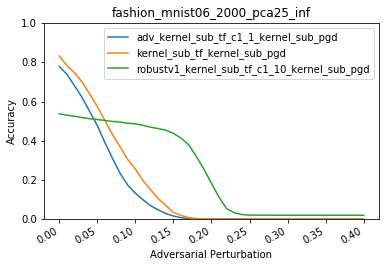

('identity', 'halfmoon2000', 'adv_kernel_sub_tf_c1_1', 'inf', 'kernel_sub_pgd') 5
('identity', 'halfmoon2000', 'kernel_sub_tf', 'inf', 'kernel_sub_pgd') 5
('identity', 'halfmoon2000', 'robustv1_kernel_sub_tf_c1_3', 'inf', 'kernel_sub_pgd') 5


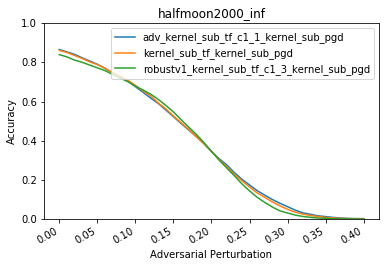

('identity', 'mnist35_2000_pca25', 'adv_kernel_sub_tf_c1_1', 'inf', 'kernel_sub_pgd') 5
('identity', 'mnist35_2000_pca25', 'kernel_sub_tf', 'inf', 'kernel_sub_pgd') 5
('identity', 'mnist35_2000_pca25', 'robustv1_kernel_sub_tf_c1_10', 'inf', 'kernel_sub_pgd') 5


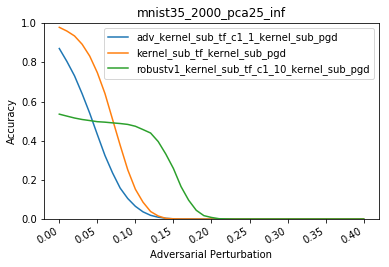

('identity', 'mnist17_2000_pca25', 'adv_kernel_sub_tf_c1_1', 'inf', 'kernel_sub_pgd') 5
('identity', 'mnist17_2000_pca25', 'kernel_sub_tf', 'inf', 'kernel_sub_pgd') 5
('identity', 'mnist17_2000_pca25', 'robustv1_kernel_sub_tf_c1_10', 'inf', 'kernel_sub_pgd') 5


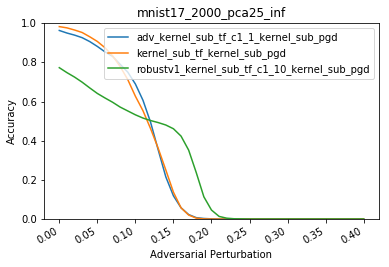

('identity', 'fashion_mnist35_2000_pca25', 'adv_kernel_sub_tf_c1_1', 'inf', 'kernel_sub_pgd') 5
('identity', 'fashion_mnist35_2000_pca25', 'kernel_sub_tf', 'inf', 'kernel_sub_pgd') 5
('identity', 'fashion_mnist35_2000_pca25', 'robustv1_kernel_sub_tf_c1_10', 'inf', 'kernel_sub_pgd') 5


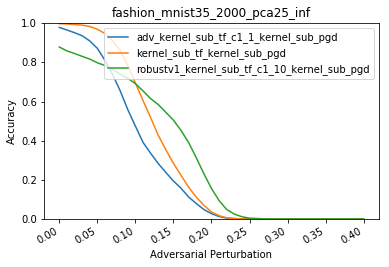

In [6]:
from params import kernel_sub_clf
exp_name = "kernel_clf"
_, grid_param, _ = kernel_sub_clf()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param])
#datasets = grid_param['dataset']
for dataset in datasets:
    for ord in set.union(*[set(g['ord']) for g in grid_param]):
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()

15
{'mnist17_2000_pca5', 'fashion_mnist35_2000_pca5', 'halfmoon2000', 'fashion_mnist06_2000_pca5', 'mnist35_2000_pca5'}
mnist17_2000_pca5
('identity', 'mnist17_2000_pca5', 'adv_knn1_1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'mnist17_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'mnist17_2000_pca5', 'robustv1_nn_k1_5', 'inf', 'rev_nnopt_k1_20') 1


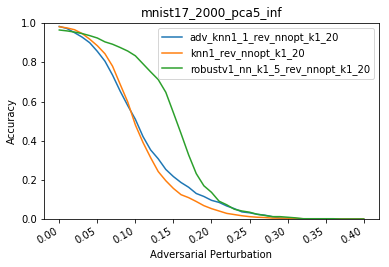

fashion_mnist35_2000_pca5
('identity', 'fashion_mnist35_2000_pca5', 'adv_knn1_1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist35_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist35_2000_pca5', 'robustv1_nn_k1_5', 'inf', 'rev_nnopt_k1_20') 1


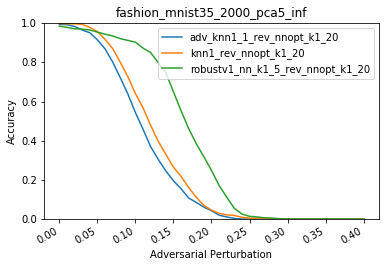

halfmoon2000
('identity', 'halfmoon2000', 'adv_knn1_1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'halfmoon2000', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'halfmoon2000', 'robustv1_nn_k1_1', 'inf', 'rev_nnopt_k1_20') 1


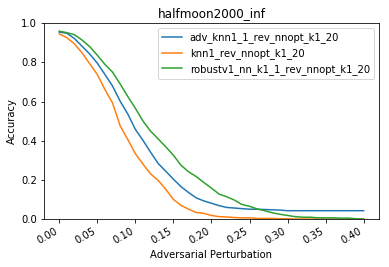

fashion_mnist06_2000_pca5
('identity', 'fashion_mnist06_2000_pca5', 'adv_knn1_1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist06_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'fashion_mnist06_2000_pca5', 'robustv1_nn_k1_5', 'inf', 'rev_nnopt_k1_20') 1


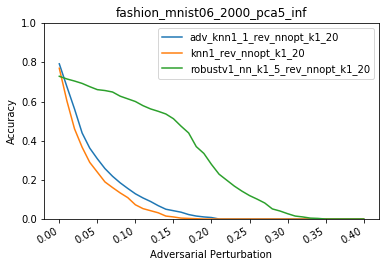

mnist35_2000_pca5
('identity', 'mnist35_2000_pca5', 'adv_knn1_1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'mnist35_2000_pca5', 'knn1', 'inf', 'rev_nnopt_k1_20') 1
('identity', 'mnist35_2000_pca5', 'robustv1_nn_k1_5', 'inf', 'rev_nnopt_k1_20') 1


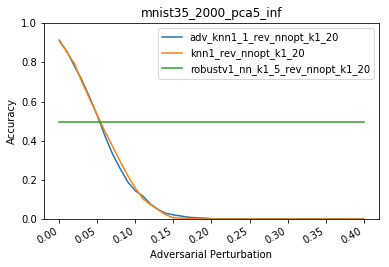

In [7]:
from params import adv_nn_large
exp_name = "adversarial_1nn"
_, grid_param, _ = adv_nn_large()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param['dataset']
print(datasets)
for dataset in datasets:
    print(dataset)
    for ord in grid_param[0]['ord']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        #ax.legend(bbox_to_anchor=(1.5, 0., 0.5, 0.5))
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()

36
mnist17_2000_pca25
('identity', 'mnist17_2000_pca25', 'adv_logistic_regression_5', 'inf', 'pgd') 3
('identity', 'mnist17_2000_pca25', 'logistic_regression', 'inf', 'pgd') 3
('identity', 'mnist17_2000_pca25', 'robustv1_logistic_regression_5', 'inf', 'pgd') 3


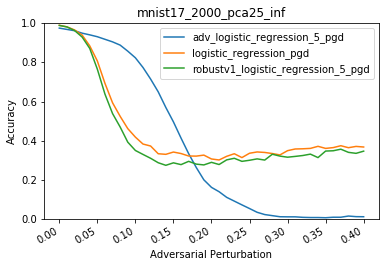

fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'adv_logistic_regression_5', 'inf', 'pgd') 3
('identity', 'fashion_mnist06_2000_pca25', 'logistic_regression', 'inf', 'pgd') 3
('identity', 'fashion_mnist06_2000_pca25', 'robustv1_logistic_regression_5', 'inf', 'pgd') 3


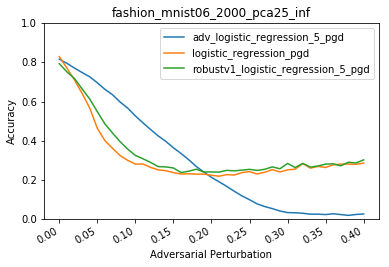

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'adv_logistic_regression_5', 'inf', 'pgd') 3
('identity', 'mnist35_2000_pca25', 'logistic_regression', 'inf', 'pgd') 3
('identity', 'mnist35_2000_pca25', 'robustv1_logistic_regression_5', 'inf', 'pgd') 3


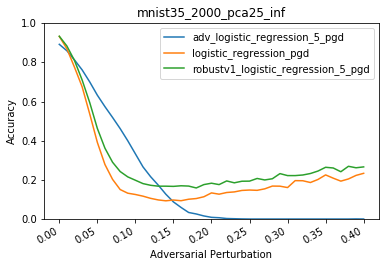

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'adv_logistic_regression_5', 'inf', 'pgd') 3
('identity', 'fashion_mnist35_2000_pca25', 'logistic_regression', 'inf', 'pgd') 3
('identity', 'fashion_mnist35_2000_pca25', 'robustv1_logistic_regression_5', 'inf', 'pgd') 3


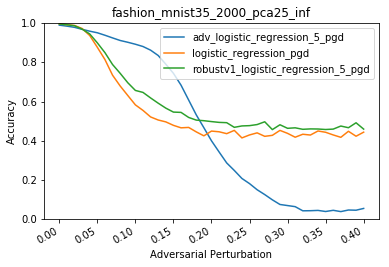

In [8]:
from params import adv_lr
exp_name = "adv_LR"
_, grid_param, _ = adv_lr()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param
for dataset in datasets:
    print(dataset)
    for ord in grid_param[0]['ord']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        #ax.legend(bbox_to_anchor=(1.5, 0., 0.5, 0.5))
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()

60
mnist17_2000_pca25
('identity', 'mnist17_2000_pca25', 'adv_sklinsvc_5', 'inf', 'sklinsvc_opt') 5
('identity', 'mnist17_2000_pca25', 'robustv1_sklinsvc_regression_5', 'inf', 'sklinsvc_opt') 5
('identity', 'mnist17_2000_pca25', 'sklinsvc', 'inf', 'sklinsvc_opt') 5


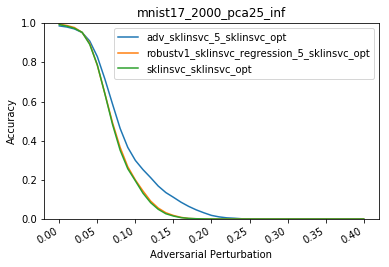

fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'adv_sklinsvc_5', 'inf', 'sklinsvc_opt') 5
('identity', 'fashion_mnist06_2000_pca25', 'robustv1_sklinsvc_regression_5', 'inf', 'sklinsvc_opt') 5
('identity', 'fashion_mnist06_2000_pca25', 'sklinsvc', 'inf', 'sklinsvc_opt') 5


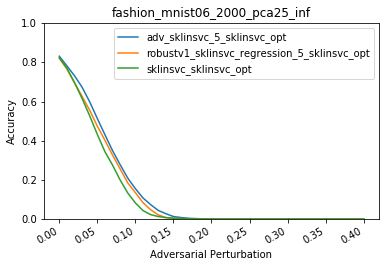

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'adv_sklinsvc_5', 'inf', 'sklinsvc_opt') 5
('identity', 'mnist35_2000_pca25', 'robustv1_sklinsvc_regression_5', 'inf', 'sklinsvc_opt') 5
('identity', 'mnist35_2000_pca25', 'sklinsvc', 'inf', 'sklinsvc_opt') 5


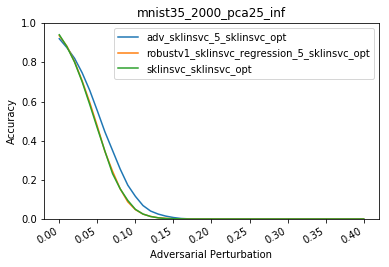

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'adv_sklinsvc_5', 'inf', 'sklinsvc_opt') 5
('identity', 'fashion_mnist35_2000_pca25', 'robustv1_sklinsvc_regression_5', 'inf', 'sklinsvc_opt') 5
('identity', 'fashion_mnist35_2000_pca25', 'sklinsvc', 'inf', 'sklinsvc_opt') 5


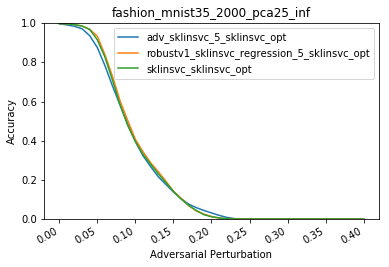

In [9]:
from params import adv_sklinsvc
exp_name = "adv_sklinsvc"
_, grid_param, _ = adv_sklinsvc()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param
for dataset in datasets:
    print(dataset)
    for ord in ['inf']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()

48
mnist17_2000_pca25
('identity', 'mnist17_2000_pca25', 'adv_sklr_5', 'inf', 'sklr_opt') 4
('identity', 'mnist17_2000_pca25', 'robustv1_sklr_regression_5', 'inf', 'sklr_opt') 4
('identity', 'mnist17_2000_pca25', 'sklr', 'inf', 'sklr_opt') 4


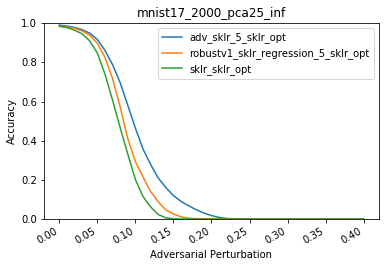

fashion_mnist06_2000_pca25
('identity', 'fashion_mnist06_2000_pca25', 'adv_sklr_5', 'inf', 'sklr_opt') 4
('identity', 'fashion_mnist06_2000_pca25', 'robustv1_sklr_regression_5', 'inf', 'sklr_opt') 4
('identity', 'fashion_mnist06_2000_pca25', 'sklr', 'inf', 'sklr_opt') 4


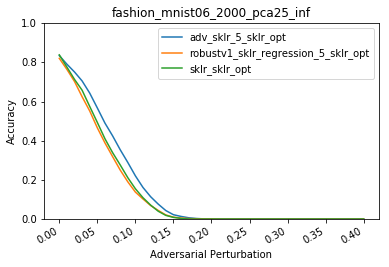

mnist35_2000_pca25
('identity', 'mnist35_2000_pca25', 'adv_sklr_5', 'inf', 'sklr_opt') 4
('identity', 'mnist35_2000_pca25', 'robustv1_sklr_regression_5', 'inf', 'sklr_opt') 4
('identity', 'mnist35_2000_pca25', 'sklr', 'inf', 'sklr_opt') 4


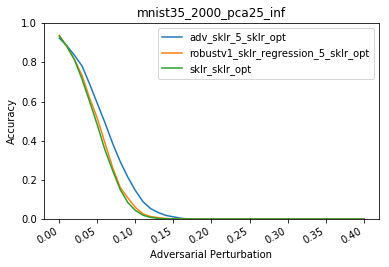

fashion_mnist35_2000_pca25
('identity', 'fashion_mnist35_2000_pca25', 'adv_sklr_5', 'inf', 'sklr_opt') 4
('identity', 'fashion_mnist35_2000_pca25', 'robustv1_sklr_regression_5', 'inf', 'sklr_opt') 4
('identity', 'fashion_mnist35_2000_pca25', 'sklr', 'inf', 'sklr_opt') 4


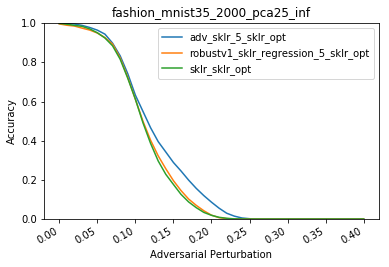

In [10]:
from params import adv_sklr
exp_name = "adv_sklr"
_, grid_param, _ = adv_sklr()

df = params_to_dataframe(grid_param)
datasets = set.union(*[set(g['dataset']) for g in grid_param]) if isinstance(grid_param, list) else grid_param
for dataset in datasets:
    print(dataset)
    for ord in ['inf']:
        temp_df = df.loc[(df['dataset'] == dataset) & (df['ord'] == ord)]
        fig, ax = plt.subplots()
        ax.set_title(f'{dataset}_{ord}')
        for name, group in temp_df.groupby(['transformer', 'dataset', 'model', 'ord', 'attack']):
            print(name, len(group))
            eps_list = [re.findall(r'[-+]?\d*\.\d+|\d+', t)[0] for t in group.mean().index.tolist()[:-1]]
            s = [r for r in group.mean().tolist()[:-1] if not np.isnan(r)]
            x = [float(eps_list[i]) for i, r in enumerate(group.mean().tolist()[:-1]) if not np.isnan(r)]

            ax.plot(x, s, label="%s_%s" % (name[2], name[-1]))

        fig.autofmt_xdate()
        ax.legend()
        ax.set_ylim(0, 1)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Adversarial Perturbation')
        plt.savefig(f'./figs/{exp_name}_{dataset}_{ord}.eps', format='eps')
        plt.show()